# Clean data from test1_2.txt to dataframe and Plot Graph

- This program is used to export the txt file to dataframe in python. The txt is captured from the experiment#1 in Github. File location : https://github.com/TNatapon/Privacy_SDN_Edge_IoT/blob/main/PlanB/Experiment1/test1_2_edge1.txt

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io


# Input filename that you want to clean data

In [2]:
# this pandas version dose not support directlly loading the file from url.
url = 'https://github.com/TNatapon/Privacy_SDN_Edge_IoT/blob/main/PlanB/Experiment1/test1_2_edge1.txt'
filename = "/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/Experiment1/test1_2_edge1.txt"

# Functions for getting the throughput data from dataframe df


In [3]:
def getDataframeThru(df,start_row,measurement_interval,header_range):
    '''
    measurement_interval = 30 (sec) : 
    header_range = 10 lines
    start_row = 0 
    '''
    
    df1 = df.drop(labels=range(start_row, header_range), axis=0)
    df1t = df1.drop(labels=range(measurement_interval, len(df)), axis=0)
    
    return df1t

In [4]:
def getDatafromTxT(filename, headerrange):
    """
    Get dataframe from txt file:
    filename : xxx.txt
    headerrange : number of lines that needed to be removed. 
    
    return : df : datafame type
    """
    h = headerrange + 1
    skip_1 = list(range(0,h, 1))
    df = pd.read_csv(filename,
        skiprows=skip_1,
        header=None,
        delimiter=' ',
        skipinitialspace=True,
        error_bad_lines=False)
    return df
    

# Run fuctions
- df_all parameter is a collection of the througput data for 10 itterations of the measurement.
- The header of txt file consists of 9 lines. (we let headerrange = 9)
- The measured data every 1 sec for 30 sec per itteration. (we let measurement_intervel = 30).

In [5]:
headerrange = 10
filename = "/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/Experiment1/test1_2_edge1.txt"

df = getDatafromTxT(filename, headerrange)
print(df.head)

<bound method NDFrame.head of                                                     0    1            2   \
0                                                    [   5]    0.00-1.00   
1                                                    [   5]    1.00-2.00   
2                                                    [   5]    2.00-3.00   
3                                                    [   5]    3.00-4.00   
4                                                    [   5]    4.00-5.00   
..                                                 ...  ...          ...   
370                                                  [   5]  28.00-29.00   
371                                                  [   5]  29.00-30.00   
372                                                  [   5]  30.00-30.10   
373                                                  [  ID]     Interval   
374  ----------------------------------------------...  NaN          NaN   

           3        4       5           6          7     

b'Skipping line 43: expected 12 fields, saw 25\nSkipping line 45: expected 12 fields, saw 13\nSkipping line 83: expected 12 fields, saw 25\nSkipping line 85: expected 12 fields, saw 13\nSkipping line 123: expected 12 fields, saw 25\nSkipping line 125: expected 12 fields, saw 13\nSkipping line 163: expected 12 fields, saw 25\nSkipping line 165: expected 12 fields, saw 13\nSkipping line 203: expected 12 fields, saw 25\nSkipping line 205: expected 12 fields, saw 13\nSkipping line 243: expected 12 fields, saw 25\nSkipping line 245: expected 12 fields, saw 13\nSkipping line 283: expected 12 fields, saw 25\nSkipping line 285: expected 12 fields, saw 13\nSkipping line 323: expected 12 fields, saw 25\nSkipping line 325: expected 12 fields, saw 13\nSkipping line 363: expected 12 fields, saw 25\nSkipping line 365: expected 12 fields, saw 13\nSkipping line 403: expected 12 fields, saw 25\nSkipping line 405: expected 12 fields, saw 13\n'


In [6]:
headerrange = 9
measurement_interval = 30 
start_row = 0 
df_all = df.drop(labels=range(1, len(df)), axis=0) # create df
print(df_all)


for i in range(0,9):
    print('i = ',i)
    if i == 0 :
        h = 0
        m = measurement_interval + h
        df1 = getDataframeThru(df,start_row,m,h)
        result = pd.concat([df_all,df1])
        df_all = df.drop(labels=0, axis=0)
        print('df1 = ',df1)
    else:
        h = m + headerrange -1
        m = measurement_interval + h 
        print('measurement_interval: ',m)
        print('hd = ', h)
        
        df1 = getDataframeThru(df,start_row,m,h)
        
        print('df1 = ',df1)
        result = pd.concat([df_all,df1])
        
    df_all = result

  0   1          2    3     4       5     6          7      8   9       10  \
0  [  5]  0.00-1.00  sec  1.91  MBytes  16.1  Mbits/sec  0.667  ms  0/1386   

     11  
0  (0%)  
i =  0
df1 =     0   1            2    3     4       5     6          7      8   9       10  \
0   [  5]    0.00-1.00  sec  1.91  MBytes  16.1  Mbits/sec  0.667  ms  0/1386   
1   [  5]    1.00-2.00  sec  1.77  MBytes  14.9  Mbits/sec  1.090  ms  0/1283   
2   [  5]    2.00-3.00  sec  1.54  MBytes  12.9  Mbits/sec  1.797  ms  0/1115   
3   [  5]    3.00-4.00  sec  1.55  MBytes  13.0  Mbits/sec  2.660  ms  0/1120   
4   [  5]    4.00-5.00  sec  1.45  MBytes  12.1  Mbits/sec  2.139  ms  0/1047   
5   [  5]    5.00-6.00  sec  1.67  MBytes  14.0  Mbits/sec  1.001  ms  0/1211   
6   [  5]    6.00-7.00  sec  1.18  MBytes  9.88  Mbits/sec  1.540  ms   0/853   
7   [  5]    7.00-8.00  sec  1.70  MBytes  14.3  Mbits/sec  0.613  ms  0/1232   
8   [  5]    8.00-9.00  sec   936  KBytes  7.67  Mbits/sec  1.218  ms   0/662   

In [7]:
# Replace new columns header
df_all = df_all.drop(labels=0, axis=0) # drop row 0 due to the same info to row 1

df_all_new = df_all.drop(df_all.columns[[0,1,3, 5,7,9,11]], axis=1)  
df_all_new.rename({2 :'Interval', 4 : 'Transfer', 6 :'Bitrate', 8 :'Jitter', 10 :'Lost/Total Datagrams'}, axis=1, inplace=True)
print(df_all_new)

        Interval Transfer Bitrate Jitter Lost/Total Datagrams
1      1.00-2.00     1.77    14.9  1.090               0/1283
2      2.00-3.00     1.54    12.9  1.797               0/1115
3      3.00-4.00     1.55    13.0  2.660               0/1120
4      4.00-5.00     1.45    12.1  2.139               0/1047
5      5.00-6.00     1.67    14.0  1.001               0/1211
..           ...      ...     ...    ...                  ...
329  25.00-26.00     2.09    17.6  1.288               0/1517
330  26.00-27.00     2.17    18.2  1.098               0/1572
331  27.00-28.00     2.22    18.6  0.627               0/1609
332  28.00-29.00     2.18    18.3  1.403               0/1578
333  29.00-30.00     2.00    16.8  1.051               0/1449

[269 rows x 5 columns]


In [8]:
## export dataframe to csv 
filename_csv = "/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/Experiment1/test1_2_edge1.csv"
df_all_new.to_csv(filename_csv)

# Plot dataframe


In [9]:
print(df_all_new['Interval'])

1        1.00-2.00
2        2.00-3.00
3        3.00-4.00
4        4.00-5.00
5        5.00-6.00
          ...     
329    25.00-26.00
330    26.00-27.00
331    27.00-28.00
332    28.00-29.00
333    29.00-30.00
Name: Interval, Length: 269, dtype: object


In [10]:
print(len(df_all_new.index))
time = np.array(range(len(df_all_new.index)))
print(time)

df_all_new['Time'] = time
print(df_all_new.head)
df_all_new['Time'] = df_all_new['Time'].astype(int) 
df_all_new['Bitrate'] = df_all_new['Bitrate'].astype(float) 

269
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 24

## Throughput 

In [11]:
# avergae throughput 
sumThroughput = df_all_new['Bitrate'].sum()
avgSumThroughput = sumThroughput/len(time)
print('avg Throughput :', avgSumThroughput)
print('var Throughput :', df_all_new['Bitrate'].var())

avg Throughput : 16.730223048327137
var Throughput : 8.409070845586207


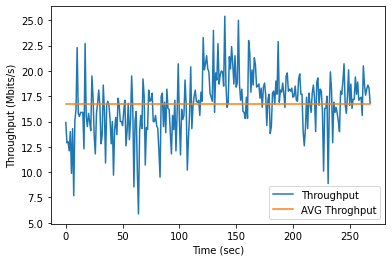

In [12]:
# Throughput 
ax = plt.gca()
df_all_new.plot(kind='line', x='Time', y='Bitrate', ax =ax)
plt.legend(["Throughput"]);
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Throughput (Mbits/s)")
avg_thr = np.ones(len(df_all_new.index),dtype = float)*avgSumThroughput
s = pd.DataFrame(avg_thr, columns = ['AVG Throghput'])
s.plot(ax=ax)
plt.show()

## Jitter

In [13]:
df_all_new['Jitter'] = df_all_new['Jitter'].astype(float) 

In [14]:
# avergae jitter 
sumThroughput = df_all_new['Jitter'].sum()
avgSumThroughput = sumThroughput/len(time)
print('avg Jitter :', avgSumThroughput)
print('var Jitter :', df_all_new['Jitter'].var())

avg Jitter : 1.2076951672862453
var Jitter : 0.5939444216556631


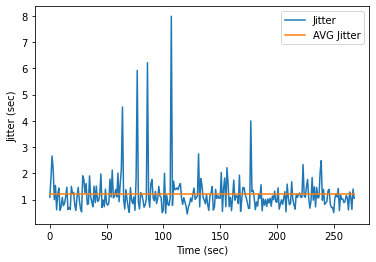

In [15]:
avg_thr = np.ones(len(df_all_new.index),dtype = float)*avgSumThroughput
J = pd.DataFrame(avg_thr, columns = ['AVG Jitter'])

ax2 = plt.gca()
df_all_new.plot(kind='line', x='Time', y='Jitter', ax =ax2)
plt.legend(["Jitter"]);
ax2.set_xlabel("Time (sec)")
ax2.set_ylabel("Jitter (sec)")
J.plot(ax=ax2)
plt.show()